In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [148]:
data_path = "/Users/omaraguilarjr/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/Kaggle/titanic/"

train_df = pd.read_csv(data_path + "train.csv")
test_df = pd.read_csv(data_path + "test.csv")

In [149]:
features = ["Pclass", "Age", "Fare", "Sex", "Parch", "SibSp", "Embarked"]
target = "Survived"

In [150]:
X = pd.get_dummies(train_df[features], columns=["Sex", "Embarked"], drop_first=True)
y = pd.get_dummies(train_df[target], columns=["Sex", "Embarked"], drop_first=True)

X.head()

,Pclass,Age,Fare,Parch,SibSp,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,1,True,False,True
1,1,38.0,71.2833,0,1,False,False,False
2,3,26.0,7.9250,0,0,False,False,True
3,1,35.0,53.1000,0,1,False,False,True
4,3,35.0,8.0500,0,0,True,False,True


In [151]:
imputer = SimpleImputer(strategy="median")
X_imp = imputer.fit_transform(X)
X_test = imputer.fit_transform(X_test)

In [152]:
X_train, X_valid, y_train, y_valid = train_test_split(X_imp, y, test_size=0.2, random_state=42)

In [153]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

/opt/anaconda3/envs/venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [154]:
y_pred = rf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8101


In [155]:
feature_names = ["Pclass", "Age", "Fare", "Sex_male", "Parch", "SibSp", "Embarked_Q", "Embarked_S"]

importances = rf.feature_importances_

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

/var/folders/94/4yrr7jkx38g5mh_1nvlyzm4m0000gn/T/ipykernel_12535/2122344286.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="coolwarm")


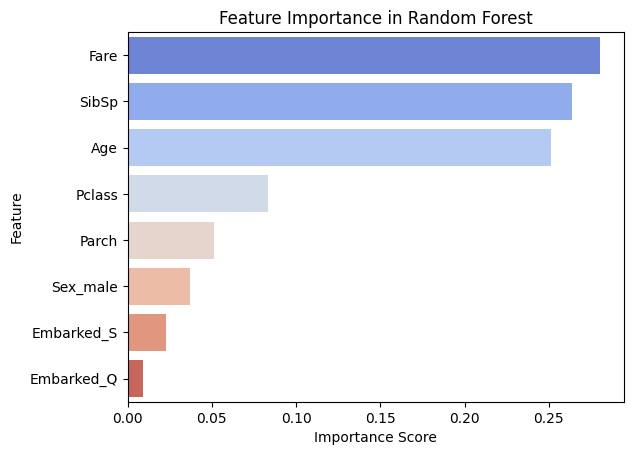

In [156]:
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="coolwarm")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()